In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Ciro Salcedo, cgs2155

Collaborators: Victor Zhou, Ceasar Stringfield

# HW 2:  Forms of Error



## Question 1

Consider the expression
$$
    f(x) = \frac{1}{x - 1}
$$

**(a)** [10] Expand $f(x)$ in a Taylor series representation about $x_0 = 0$.

$f(x) = \Sigma ^{\infty}_{n=0} \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n = \Sigma ^{\infty}_{n=0} \frac{f^{(n)}(0)}{n!} x^n = \Sigma ^{\infty}_{n=0}  -(x)^n$

**(b)** [5] What is the expected operation count if we truncate the series to $N$ terms?  Simplify the power to multiplications rather than something more exotic.  Stating the answer in terms of big-O notation is fine.

Brute forcing the Taylor Series will result in  $\mathcal{O}(\frac{n^2}{2})$ as evaluating an exponent to the mth power with require m multiplications. Using Horner's methods, the operation count can be reduced to $\mathcal{O}(n)$

**(c)** [15] Make two plots of the relative error of the approximation vs. the true value of the function.  In the first pick a value to evaluate both functions at keeping $x_0 \neq x$ but vary the number of terms you keep ($N$).  In the second fix $N$ and vary $x$.  Explain what you observe.  

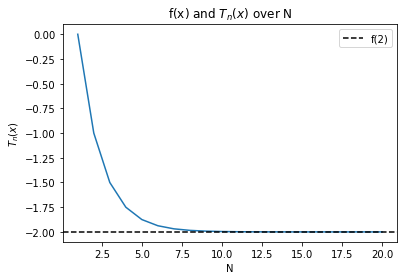

In [4]:
# YOUR CODE HERE
#fixed X
X = .5
N = 20
f = 1/(X-1)
F = numpy.zeros(N)
for i in range(N):
    for j in range (i):
        F[i] += -1*(X)**j
r = numpy.abs(f - F)/ numpy.abs(f)
        
#plt.plot(numpy.linspace(1,N,N), r)
#plt.title("Relative Error as Function of N")

plt.plot(numpy.linspace(1,N,N),F)
plt.axhline(f,linestyle="--",color = "black",label="f(2)")
plt.title("f(x) and $T_n(x)$ over N")
plt.xlabel("N")
plt.ylabel("$T_n(x)$")
plt.legend()

Text(0.5, 1.0, 'Relative Error vs N')

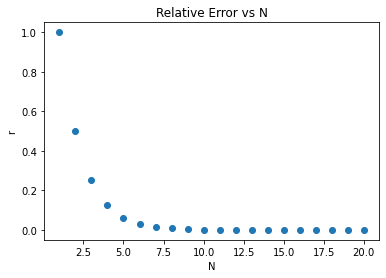

In [5]:
plt.scatter(numpy.linspace(1,N,N),r)
plt.xlabel("N")
plt.ylabel("r")
plt.title("Relative Error vs N")

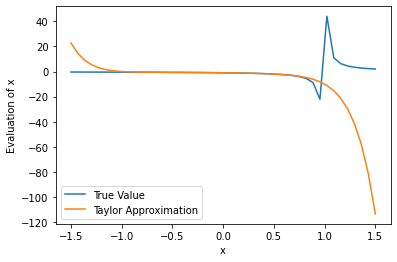

In [6]:
#Fixed N
X = numpy.linspace(-1.5,1.5,45)
N=10
f = [1/(x-1) for x in X]
F = numpy.zeros(len(X))
for i in range(len(X)):
    for j in range(N):
        F[i] += -1*(X[i])**j
r = numpy.abs(f - F)/ numpy.abs(f)

plt.plot(X,f,label="True Value")
plt.plot(X,F,label="Taylor Approximation")
plt.xlabel("x")
plt.ylabel("Evaluation of x")
plt.title("")
plt.legend()

Text(0.5, 1.0, 'Relative Error vs x')

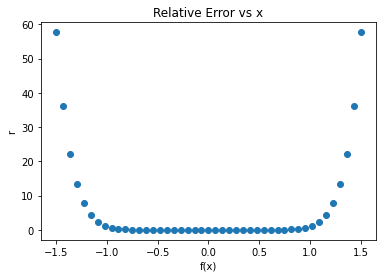

In [7]:
plt.scatter(X,r)
plt.xlabel("f(x)")
plt.ylabel("r")
plt.title("Relative Error vs x")

Text(0.5, 1.0, 'Relative Error vs f(x)')

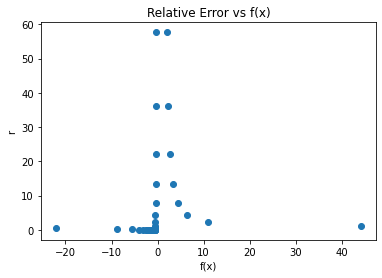

In [8]:
plt.scatter(f,r)
plt.xlabel("f(x)")
plt.ylabel("r")
plt.title("Relative Error vs f(x)")

There are two contributing factors to error. Firstly, as the approximation is evaluated further from the center, 0, the error greatly increases. This is most noticeable when evaluating the function when |x| is greater than 1. Secondly, increasing N improves the relative error. For evaluations of f(0.5), the reduction in relative error appears to plateau around N = 8.

## Question 2

**(a)** [5] Consider the following two equivalent sums:

$$
    \sum^\infty_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^\infty_{n=1} \frac{1}{n (n + 1)}
$$

Write two Python functions that compute each of these sums but to a finite number of terms $N$.

In [9]:
def sum_1(N):
    """Compute the summation S_N defined as
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    :Input:
     *N* (int) The upper bound on the summation.
    Returns Sn (float)
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    Sn = 0
    for n in range(1, N + 1):
        Sn += 1/n - 1/(n + 1)
    return Sn
def sum_2(N):
    """Compute the summation S_N defined as
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    :Input:
     *N* (int) The upper bound on the summation.
    Returns Sn (float)
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    Sn = 0
    for n in range(1, N + 1):
        Sn += 1/(n*(n + 1))
    return Sn

In [10]:
for N in range(5, 21, 5):
    numpy.testing.assert_allclose(sum_1(N), sum_2(N))
print("Success!")

Success!


**(b)** [5] Compute the absolute error between the two summation approaches.

In [11]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    # YOUR CODE HERE
    return abs(sum_1(N) - sum_2(N))

In [12]:
N = numpy.logspace(1, 7, 7, dtype=int)
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.zeros(answer.shape), atol=1e-10)
print("Success!")

Success!


**(c)** [10] Plot the relative and absolute error versus $N$ up to large $N$ (above at least $10^4$).  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

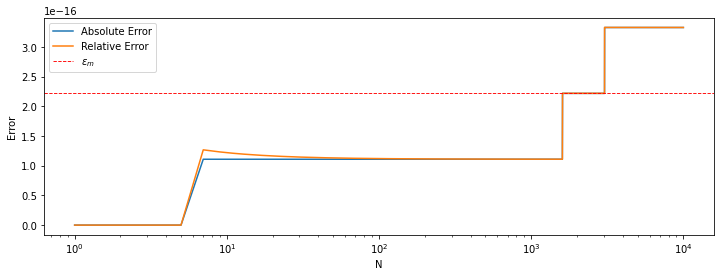

In [13]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

# YOUR CODE HERE
N = numpy.linspace(1,1e4,int(5e3))
a_err = [abs_error(int(n)) for n in N]
r_err = [abs_error(int(n))/sum_1(int(n)) for n in N]

plt.semilogx(N,a_err,label="Absolute Error")
plt.semilogx(N,r_err,label="Relative Error")
plt.axhline(numpy.finfo(float).eps, label="$\epsilon_m$",color="red",linestyle="--",lw=.9)
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.show()

**(d)** [5] Theorize what may have lead to the differences in answers.

Error jumps up twice for two values of n > 1000. This sharp increase is likely due to floating point error caused by the division. This is clearly some type of rounding or truncation error as it stays completely flat until a value high enough to meet the threshold for rounding up allows for a jump.

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** [10] Derive the upper bound on the *relative error* $r_n$ assuming that $0 < x$ and

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

The residual is given by:

$$R_n = \frac{f^{n+1}(c)(x-x_0)^{n+1}}{(n+1)!} = f(x) - T_n(x)$$
This we can rewrite the relative error $r_n$ as 
$$r_n = \frac{|R_n|}{|e^x|} = \frac{f^{n+1}(c)(x-x_0)^{n+1}}{(n+1)! e^x}$$

$x_0$ is approaching zero, and we know c is some number less than x:
$$r_n = \frac{f^{n+1}(c)(x)^{x+1}}{(n+1)! e^x} = |\frac{e^x(x)^{n+1}}{(n+1)! e^x}| \leq  |\frac{x^{n+1}}{(n+1)!}|$$


**(b)** [10] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

Demonstrate
$$r_n =|\frac{x^{n+1}}{(n+1)!}| \leq \epsilon_{machine}$$

This means that:
$$x^{n+1} \lt (n+1)!$$
as machine epsilon must be fractional.

$$log(x^{n+1}) \lt log((n+1)!)$$

$$(n+1) log(x) \lt log((n+1)!)$$

$$(n+1) log(x) \lt (n+1)log(n+1) - (n+1)$$

$$log(x) \lt log(n+1) - 1$$

$$log(x) + 1 \lt log(n+1)$$

For large n let's say that $log(n+1) \approx log(n)$
So now:

$$log(x) + 1 \lt log(n)$$

$$log(x \cdot e) \lt log(n)$$

$$x \cdot e \lt n$$

$$n \gt e \cdot x$$


**(c)** [10] Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [14]:
# HINT: Think about how we evaluated polynomials efficiently in class

import math as m

def Tn_exp(x, tolerance=1e-3):
    MAX_N = 100
    Tn = numpy.zeros(len(x))
    # YOUR CODE HERE
    #coefficients for Horners Method
    coeffs = [1/m.factorial(n) for n in range(MAX_N)]
    #redo Horner's method with an additional term considered
    for n in range (1,MAX_N+1):
        N=n
        #Do Horner's method for each x for a given n
        coeff_n=coeffs[:n] #coefficient for Horner
        coeff_n.reverse()
        for j in range(len(x)):
            Tn[j] = coeff_n[0]
            for i in coeff_n[1:]:
                Tn[j] = Tn[j] * x[j] + i
                
        #evaluate if it's in tolerance, return the function if it is
        if(numpy.all(numpy.abs(Tn - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance)):
            return Tn, N
    
    return Tn, N

In [15]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print("Success!")

Success!


## Question 4

[5] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


Assuming that $\delta x$ is the notation for small x we can use the theorem for small x. However, the order of approximation for the sum is the same regardless of the size of x accorduing to the theorem.

 $$f(x) =\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$
 $$f(x) = p(x) + \mathcal{O}(x^n)$$
 $$g(x) = \cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$
 $$f(x) = q(x) + \mathcal{O}(x^m)$$
 Let
 $$r = \mathrm{min}(n,m)$$

$$f+g = p + q + \mathcal{O}(\Delta x^n) + \mathcal{O}(\Delta x^m) = p + q + \mathcal{O}(\Delta x^r)$$
$$f+g = 1 + \Delta x + \Delta x^2 + \Delta x^3 + 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^4)$$

So the order of approximation for the sum is $\mathcal{O}(\Delta x^4)$ if x is small otherwise, r would be replaced with the maximum of the two numbers giving an exponent of 6 instead. 

For products
Let
$$ r = \mathrm{min()}$$
$$f \cdot g = p \cdot q + p\mathcal{O}(\Delta x^m) + q\mathcal{O}(\Delta x^n) + \mathcal{O}(\Delta x^{n+m})$$

$$ = p \cdot q + \mathcal{O}(\Delta x^{n+m})$$

For small x it can be further reduced to 

$$ = p \cdot q + \mathcal{O}(\Delta x^{r})$$

$$r = \mathrm{min}(4,6) = 4$$

So the order of approximation is still $\mathcal{O}(\Delta x^4)$ if x is small, otherwise it would be $\mathcal{O}(\Delta x^{10})$

## Question 5

Consider the operation
$$\begin{aligned}
    f(x,y) = \frac{1}{x + y}
\end{aligned}$$
for the following questions.

**(a)** [5] Estimate the relative error due to floating point approximations to the representation of the numbers assuming exact operations.

$$
    \mathrm{fl}(f(x,y)) =  \frac{1}{x (1 + \delta_1) + y (1 + \delta_2)} = \frac{1}{x + x\delta_1 + y + y\delta_2}
$$


The formula for relative error is:

$$ r =  \frac{|\frac{1}{x+y} - (\frac{1}{x + x\delta_1 + y + y\delta_2})|}{|\frac{1}{x+y}|} = \frac{|\frac{1}{x+y} - (\frac{1}{(x + y)(1  + \frac{x\delta_1+y\delta_2}{x+y})})|}{|\frac{1}{x+y}|}$$

$$ r = \frac{\frac{x \delta_1 + y \delta_y}{(x+y)^2(1+ \frac{x\delta_1+y\delta_2}{x+y})}}{|\frac{1}{x+y}|} = \frac{x\delta_1+y\delta_2}{(x+y)(1 + \frac{x\delta_1+y\delta_2}{x+y})} = \frac{x\delta_1+y\delta_2}{x + y + x\delta_1+y\delta_2}$$



**(b)** [5] Demonstrate this behavior by plotting the relative error.

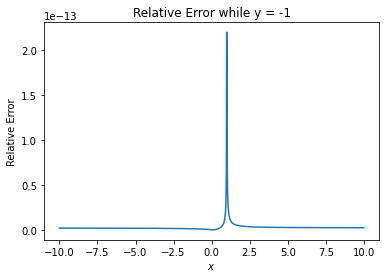

In [52]:
#im going to assume the delta is equal to machine epsilon in both cases
#im going to fix y=-1 and vary x
x = numpy.linspace(-10, 10, 1000)
y = -1
delx = 10*numpy.finfo(float).eps
dely = numpy.finfo(float).eps
#r = [(i*delta-delta)/(i - 1 + i*delta -delta) for i in x]

r = abs((x*delx + y*dely)/(x+y+x*delx+y*dely))

plt.plot(x, r)
plt.xlabel("$x$")
plt.ylabel("Relative Error")
plt.title("Relative Error while y = -1")
plt.show()